## 
- 가지고 있는 것: day 0~6의 Target
- 예측할 것: day 7~8의 Target

- Hour - 시간
- Minute - 분
- DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
- DNI - 직달일사량(Direct Normal Irradiance (W/m2))
- WS - 풍속(Wind Speed (m/s))
- RH - 상대습도(Relative Humidity (%))
- T - 기온(Temperature (Degree C))
- Target - 태양광 발전량 (kW)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')


Bad key "axes.titlelocation" on line 10 in
C:\Users\gon2gon2\.matplotlib\stylelib\mystyle.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key "axes.titlecolor" on line 13 in
C:\Users\gon2gon2\.matplotlib\stylelib\mystyle.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_orig = pd.read_csv('./data/train/train.csv')
sample = pd.read_csv('./data/sample_submission.csv')

In [3]:
train_orig

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [13]:
test_dir = './data/test'

In [16]:
fnames = os.listdir(test_dir)

In [24]:
test_whole = pd.read_csv(os.path.join(test_dir, '0.csv'))
for fname in fnames[1:]:
    file_dir = os.path.join(test_dir,fname)
    file = pd.read_csv(file_dir)
    test_whole = pd.concat([test_0,file])

In [23]:
test_0.r

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,2.7,55.31,14.9,0.0
332,6,22,0,0,0,3.0,55.48,14.5,0.0
333,6,22,30,0,0,3.1,56.20,14.3,0.0
334,6,23,0,0,0,3.2,54.87,14.0,0.0


In [11]:
test_0 = pd.read_csv('./data/test/0.csv')
test_1 = pd.read_csv('./data/test/1.csv')
test_2 = pd.read_csv('./data/test/2.csv')

In [15]:
test_80 = pd.read_csv('./data/test/80.csv')

In [20]:
display(test_0)
display(test_80)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,3.6,56.09,-8.0,0.0
332,6,22,0,0,0,3.4,53.54,-8.2,0.0
333,6,22,30,0,0,3.4,53.89,-8.3,0.0
334,6,23,0,0,0,3.4,51.96,-8.4,0.0


,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.1,82.64,3.9,0.0
1,0,0,30,0,0,2.1,83.22,3.8,0.0
2,0,1,0,0,0,2.0,82.28,3.8,0.0
3,0,1,30,0,0,1.8,82.86,3.7,0.0
4,0,2,0,0,0,1.7,82.29,3.6,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,0.8,63.35,13.7,0.0
332,6,22,0,0,0,0.7,64.82,13.1,0.0
333,6,22,30,0,0,0.7,66.10,12.8,0.0
334,6,23,0,0,0,0.6,67.64,12.4,0.0


In [7]:
sample

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from xgboost import XGBRegressor
y = train.pop('TARGET')
xgb = XGBRegressor()

In [41]:
xgb.fit(train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
test_0

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.7,34.42,0.0,0.0
1,0,0,30,0,0,2.7,34.17,0.1,0.0
2,0,1,0,0,0,2.7,34.23,0.2,0.0
3,0,1,30,0,0,2.7,33.99,0.3,0.0
4,0,2,0,0,0,2.8,33.97,0.4,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,3.6,56.09,-8.0,0.0
332,6,22,0,0,0,3.4,53.54,-8.2,0.0
333,6,22,30,0,0,3.4,53.89,-8.3,0.0
334,6,23,0,0,0,3.4,51.96,-8.4,0.0


In [46]:
test_1

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,2.8,70.34,-6.1,0.0
1,0,0,30,0,0,2.9,71.97,-6.4,0.0
2,0,1,0,0,0,2.9,69.77,-6.7,0.0
3,0,1,30,0,0,2.9,71.95,-7.1,0.0
4,0,2,0,0,0,2.9,69.48,-7.4,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,1.7,43.65,-5.2,0.0
332,6,22,0,0,0,1.5,40.62,-4.9,0.0
333,6,22,30,0,0,1.5,40.62,-4.9,0.0
334,6,23,0,0,0,1.5,39.21,-4.9,0.0


In [50]:
max(test_80["TARGET"])

94.29731913

In [47]:
max(train_orig["TARGET"])

99.91393869

In [51]:
sample

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# groupby
- 시간별로 묶어서 확인해보기
- 날로 묶어서 확인해보기

Hour
0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
2     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
3     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
4     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
5     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
6     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
7     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
8     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
9     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
10    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
11    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
12    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
13    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
14    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
15    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
16    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
17    [[AxesSubplot(0.125,0.670278;0.215278

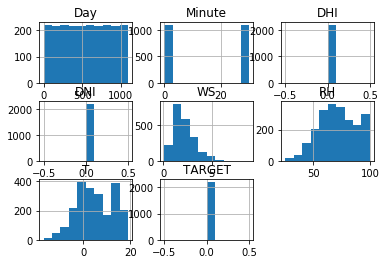

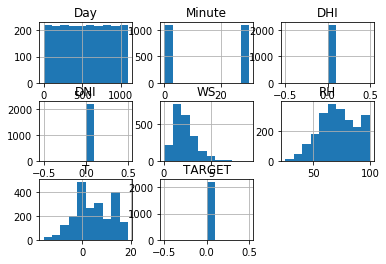

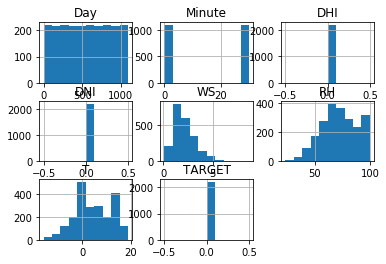

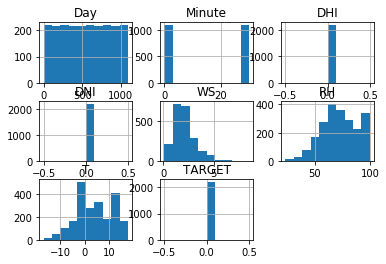

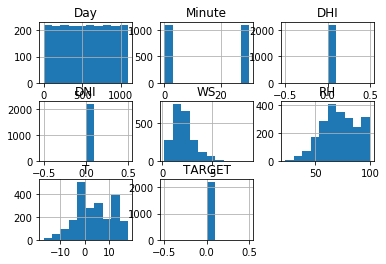

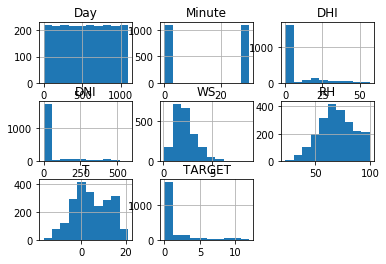

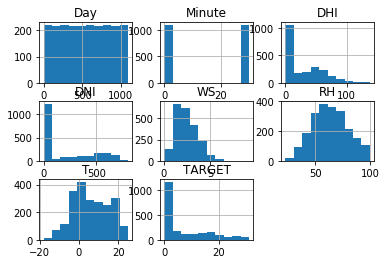

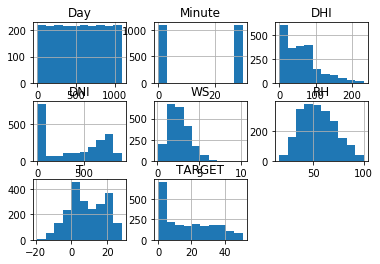

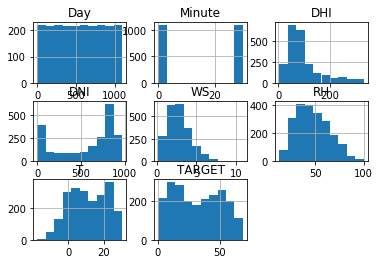

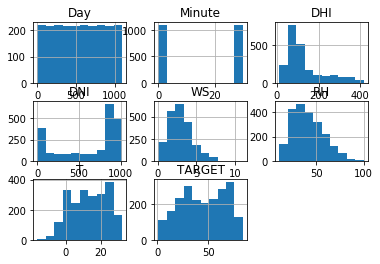

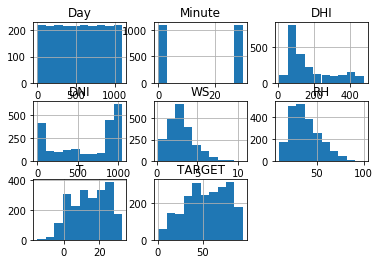

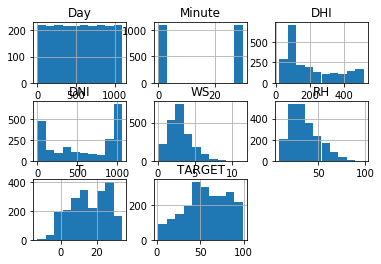

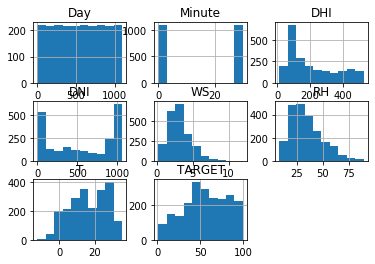

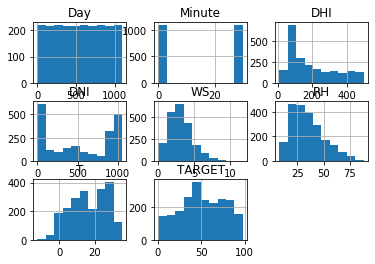

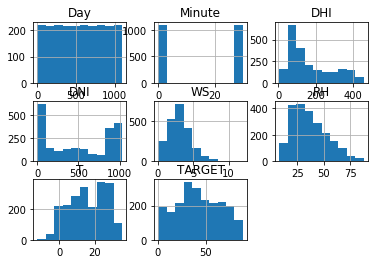

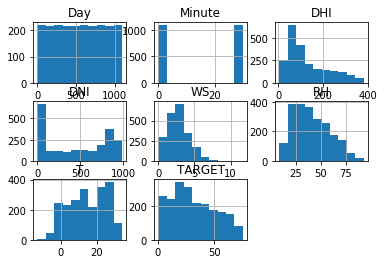

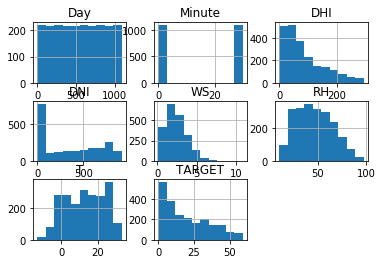

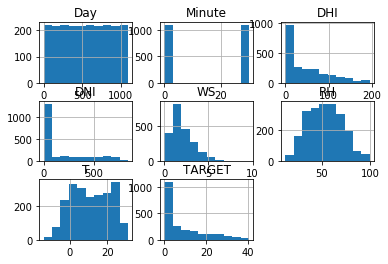

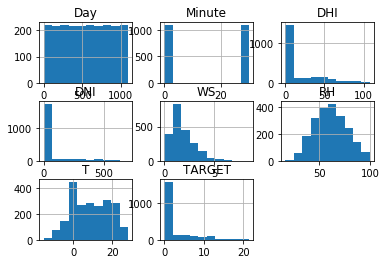

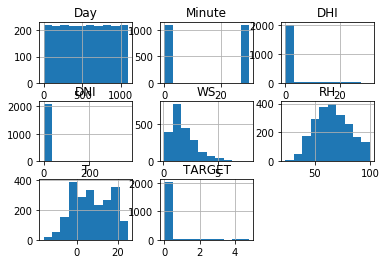

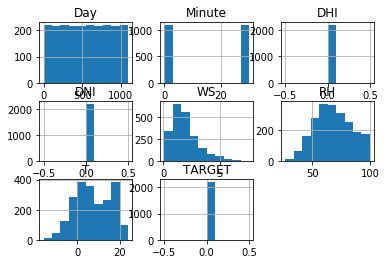

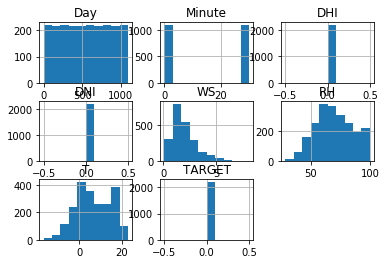

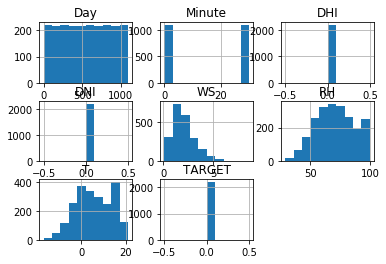

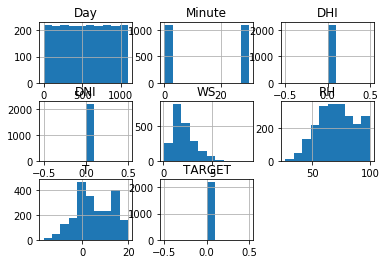

In [8]:
train= train_orig.copy()
train.groupby('Hour').hist()

In [11]:
train.groupby('Hour').mean()

,Day,Minute,DHI,DNI,WS,RH,T,TARGET
Hour,,,,,,,,
0,547.0,15.0,0.000000,0.000000,2.161553,71.572078,4.895890,0.000000
1,547.0,15.0,0.000000,0.000000,2.200274,71.695886,4.574886,0.000000
2,547.0,15.0,0.000000,0.000000,2.177352,72.137178,4.282648,0.000000
3,547.0,15.0,0.000000,0.000000,2.139635,72.552785,4.021005,0.000000
4,547.0,15.0,0.000000,0.000000,2.134201,72.179265,3.908219,0.000000
5,547.0,15.0,7.090411,56.698630,2.268995,69.653890,4.468037,1.248004
6,547.0,15.0,28.253425,208.109132,2.516484,63.602521,6.100913,7.025409
7,547.0,15.0,59.465297,387.502283,2.676804,55.201808,8.575342,17.645233
8,547.0,15.0,96.162100,561.941553,2.858904,46.932890,11.194977,31.969271


In [12]:
train.groupby('Hour').max()

,Day,Minute,DHI,DNI,WS,RH,T,TARGET
Hour,,,,,,,,
0,1094,30,0,0,8.9,100.00,19,0.000000
1,1094,30,0,0,9.0,100.00,19,0.000000
2,1094,30,0,0,8.7,100.00,19,0.000000
3,1094,30,0,0,8.5,100.00,18,0.000000
4,1094,30,0,0,8.7,100.00,18,0.000000
5,1094,30,57,574,8.8,100.00,21,11.917502
6,1094,30,138,800,9.1,100.00,25,31.059209
7,1094,30,232,907,10.2,100.00,28,50.856606
8,1094,30,331,970,10.9,100.00,30,68.963787


In [26]:
whole = pd.concat([train, test_whole])

In [27]:
whole

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12.0,0.0
1,0,0,30,0,0,1.5,69.06,-12.0,0.0
2,0,1,0,0,0,1.6,71.78,-12.0,0.0
3,0,1,30,0,0,1.6,71.75,-12.0,0.0
4,0,2,0,0,0,1.6,75.20,-12.0,0.0
...,...,...,...,...,...,...,...,...,...
331,6,21,30,0,0,2.7,55.31,14.9,0.0
332,6,22,0,0,0,3.0,55.48,14.5,0.0
333,6,22,30,0,0,3.1,56.20,14.3,0.0
334,6,23,0,0,0,3.2,54.87,14.0,0.0


# group by Hour, Minute
- 무조건 0인 시간이 존재함
- 일출 전: ~4:29
- 일몰 후: 19:59

In [29]:
whole.groupby(['Hour','Minute']).max()

Day  DHI   DNI    WS      RH     T     TARGET
Hour Minute                                                
0    0       1094    0     0   8.9  100.00  21.8   0.000000
     30      1094    0     0   8.9  100.00  21.7   0.000000
1    0       1094    0     0   9.0  100.00  21.5   0.000000
     30      1094    0     0   8.8  100.00  21.2   0.000000
2    0       1094    0     0   8.7  100.00  20.9   0.000000
     30      1094    0     0   8.5  100.00  20.4   0.000000
3    0       1094    0     0   8.4  100.00  19.9   0.000000
     30      1094    0     0   8.5  100.00  19.5   0.000000
4    0       1094    0     0   8.7  100.00  19.1   0.000000
     30      1094    3    28   8.7  100.00  19.8   0.187687
5    0       1094   28   350   8.8  100.00  20.6   4.503936
     30      1094   62   589   8.6  100.00  22.4  12.010218
6    0       1094  112   734   8.6  100.00  24.9  21.113220
     30      1094  150   821   9.1  100.00  26.5  31.059209
7    0       1094  192   877   9.6  100.00  28.1  41.004762
     30      1094  232   920  10.2  100.00  29.5  50.856606
8    0       1094  285   950  10.9  100.00  31.1  60.238419
     30      1094  331   987  10.9  100.00  32.0  68.963787
9    0       1094  376  1008  11.0  100.00  33.0  76.938345
     30      1094  416  1024  10.7  100.00  33.7  84.174145
10   0       1094  452  1041  10.9  100.00  34.6  90.366567
     30      1094  479  1057  11.0  100.00  35.2  94.106663
11   0       1094  497  1069  11.0   98.62  35.8  97.295650
     30      1094  514  1076  11.5   98.59  36.2  99.258319
12   0       1094  528  1079  12.0   89.24  36.6  99.913939
     30      1094  523  1078  11.4   89.23  36.7  99.747138
13   0       1094  500  1066  11.5   88.42  36.7  97.964263
     30      1094  481  1055  11.7   88.45  36.6  93.345799
14   0       1094  455  1046  12.0   87.23  36.5  88.561241
     30      1094  423  1025  11.8   87.96  36.2  82.557996
15   0       1094  383  1002  11.7   92.15  36.0  75.427988
     30      1094  339   969  11.3   93.04  35.6  67.642903
16   0       1094  292   924  10.9   93.27  35.1  59.293281
     30      1094  243   893  10.1   97.28  35.1  50.286707
17   0       1094  195   854   9.6   99.96  33.4  40.905443
     30      1094  149   801   9.0  100.00  31.6  31.430125
18   0       1094  108   723   8.5  100.00  29.8  22.048313
     30      1094   72   605   8.1  100.00  28.1  13.135454
19   0       1094   31   411   7.9  100.00  26.4   5.535777
     30      1094    6    70   7.7  100.00  25.8   0.562967
20   0       1094    0     0   7.6  100.00  25.2   0.000000
     30      1094    0     0   7.5  100.00  24.6   0.000000
21   0       1094    0     0   8.1  100.00  24.0   0.000000
     30      1094    0     0   8.1  100.00  23.4   0.000000
22   0       1094    0     0   8.5  100.00  22.8   0.000000
     30      1094    0     0   8.6  100.00  22.5   0.000000
23   0       1094    0     0   8.7  100.00  22.3   0.000000
     30      1094    0     0   8.8  100.00  22.1   0.000000

# 궁금한 것
- 다른 columns없이 Target 단일칼럼으로 예측해도 되지 않을까?
- 다른 columns으로 Target을 예측할 필요가 있을까?
- 애초에 Target을 예측해야 하는가?

### 1차 시도
1. 일단 TARGET만 떼어 낸다
2. TARGET을 3분할로 나눠서 하려고 생각해보니 뭔가 이상하다.
- 뭔가 놓치고 있음

In [30]:
train_orig

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


# 내보내야 하는 것
